# Seção 10.02 - Redes Neurais Artificiais (base crédito)
Para esta seção, usarei a base de dados "credit-data.csv" disponibilizada no curso do Professor Jones na UDEMY.

Motivação: Otimização da classificação usando redes neurais.

In [19]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosts!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split
                                     , cross_val_score
                                     , StratifiedKFold)

# Lidar com validação de modelos.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [10]:
nomeDaBase = "../bases/credit-data.csv"
df = pd.read_csv(nomeDaBase, sep=",", encoding="utf-8", index_col="clientid")

In [11]:
df.head().T

clientid,1,2,3,4,5
income,66155.925095,34415.153966,57317.170063,42709.534201,66952.688845
age,59.017015,48.117153,63.108049,45.751972,18.584336
loan,8106.532131,6564.745018,8020.953296,6103.642260,8770.099235
default,0.000000,0.000000,0.000000,0.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 4 columns):
income     2000 non-null float64
age        1997 non-null float64
loan       2000 non-null float64
default    2000 non-null int64
dtypes: float64(3), int64(1)
memory usage: 78.1 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
income,2000.0,45331.600018,14326.327119,20014.48947,32796.459717,45789.117313,57791.281668,69995.685578
age,1997.0,40.807559,13.624469,-52.42328,28.990415,41.317159,52.587040,63.971796
loan,2000.0,4444.369695,3045.410024,1.37763,1939.708847,3974.719419,6432.410625,13766.051239
default,2000.0,0.141500,0.348624,0.00000,0.000000,0.000000,0.000000,1.000000


### Problemas encontrados na base:
1. Em "age", há 3 valores nulos e há a presença de valores negativos.

#### OBSERVAÇÃO:

No mundo real, os problemas com as bases são muito piores. Deve-se ter muita atenção pois os dados podem não representar a realidade do processo.

In [14]:
df.loc[df.age < 0, "age"] = df.age.mean()

In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(df)
df_tratado = pd.DataFrame(data=imputer.transform(df), columns=df.columns)

## 1) Aplicação da Aprendizagem por random forests

### 1.1) Usando *train_test_split*  

In [17]:
# Separando os fatores/previsores da resposta/target:
    
x = df_tratado.iloc[:, 0:-1]
y = df_tratado.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Escalonamento
Nesse algoritmo é importante executar o escalonamento.

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

# Aplicando o modelo

In [33]:
from sklearn.neural_network import MLPClassifier

classificador = MLPClassifier(verbose=True
                             , max_iter=1000
                             , solver="lbfgs")
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)

### Verificando o como o modelo se saiu

Métrica 1 (Acurácia): 0.9875.
Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       348
         1.0       0.98      0.92      0.95        52

   micro avg       0.99      0.99      0.99       400
   macro avg       0.98      0.96      0.97       400
weighted avg       0.99      0.99      0.99       400
.
Normalized confusion matrix
[[0.99712644 0.00287356]
 [0.07692308 0.92307692]]


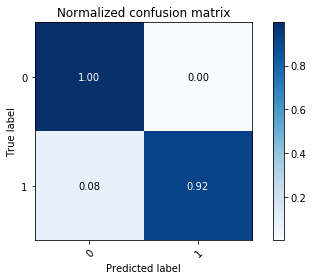

In [31]:
from sklearn.metrics import (accuracy_score
                             , classification_report
                             , confusion_matrix)

print("Métrica 1 (Acurácia): {:.6}.".format(
    accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}.".format(
    classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

### Agora, usando validação cruzada.

In [32]:
classificador.fit(x, y)

resultados = cross_val_score(classificador, x, y, cv = 5)

print("Acurácia média: {:.3} ± {:.3}.".format(resultados.mean(), resultados.std()))

Acurácia média: 0.859 ± 0.000946.
